In [30]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import math
import warnings
warnings.filterwarnings('ignore')

#import seaborn as sns
#import plotly.express as px

#from sklearn import pipeline
#from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn import naive_bayes

#from sklearn.linear_model import Lasso
#from sklearn.linear_model import Ridge
from sklearn import datasets

#from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Generate and plot a synthetic imbalanced classification dataset
#from numpy import where
#from collections import Counter
#import imblearn
#from imblearn.over_sampling import SMOTE

To install the package "mlxtend" with conda run: conda install -c conda-forge mlxtend

# Resolva o problema de classificação binária sobre o dataset "Pima Indians Diabetes Database".

In [31]:
diabetes = pd.read_csv("dataset/diabetes.csv")
print(diabetes.shape)
diabetes.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 1. Separe os dados em treino (80%) e teste (20%)

In [32]:
y = diabetes['Outcome'].values
X = diabetes.copy()
del X['Outcome']
X = X.values
print(y.shape)
print(X.shape)

(768,)
(768, 8)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## 2. Crie e avalie modelos usando kNN, Logistic Regression, SVM e Naive Bayes. Aplique um Grid Search com Validação Cruzada (CV) com k=5 no k-Fold sobre o conjunto de treino. A métrica de avaliação usada deve ser a métrica F1-Score. Teste diferentes hiperparâmetros. Escolha o melhor algoritmo e hiperparâmetros baseado no Grid Search.

In [34]:
knn = KNeighborsClassifier()
lr = LogisticRegression()
svm = SVC()
nb = naive_bayes.GaussianNB()

### Grid Search : KNeighborsClassifier

In [35]:
params_knn = {'n_neighbors':np.arange(1, 15)}
grid_knn = GridSearchCV(knn, param_grid=params_knn, cv=5, scoring='f1_weighted')
grid_knn.fit(X_train, y_train)
print(grid_knn.best_score_)
print(grid_knn.best_params_)

0.7339809610464971
{'n_neighbors': 11}


### Grid Search : LogisticRegression

In [36]:
valores_C = [1/1.00000000e-07, 1/3.16227766e-04, 1/1.00000000e+00, 1/3.16227766e+03, 1/1.00000000e+07]
params_lr = {'C' : valores_C}
grid_lr = GridSearchCV(lr, param_grid=params_lr, cv=5, scoring='f1_weighted')
grid_lr.fit(X_train, y_train)
print(grid_lr.best_score_)
print(grid_lr.best_params_)

0.7624073627526723
{'C': 1.0}


### Grid Search : SVM

In [37]:
params_svm = {'kernel' : ['rbf', 'sigmoid'], 'shrinking' : [True, False], 'probability' : [True, False], 'cache_size' : [2, 5, 10, 15, 25, 50, 10], 'class_weight' : ['dict', 'balanced']}
grid_svm = GridSearchCV(svm, param_grid=params_svm, cv=5, scoring='f1_weighted')
grid_svm.fit(X_train, y_train)
print(grid_svm.best_score_)
print(grid_svm.best_params_)

0.7443702878153821
{'cache_size': 2, 'class_weight': 'balanced', 'kernel': 'rbf', 'probability': True, 'shrinking': True}


### Grid Search : Naive Bayes

In [38]:
params_nb = {'var_smoothing' : [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}
grid_nb = GridSearchCV(nb, param_grid=params_nb, cv=5, scoring='f1_weighted')
grid_nb.fit(X_train, y_train)
print(grid_nb.best_score_)
print(grid_nb.best_params_)

0.7481880432488468
{'var_smoothing': 1e-10}


## 3. Treine um novo modelo usando o melhor resultado do Grid Search sobre todos os dados de treino (80% do dataset).

In [39]:
lr_best = LogisticRegression(C=1)
lr_best.fit(X_train, y_train)

LogisticRegression(C=1)

## 4. Avalie o modelo usando a métrica F1-Score sobre os dados de teste.

In [40]:
y_pred = lr_best.predict(X_test)
print(metrics.f1_score(y_test, y_pred))

0.6548672566371682


## 5. Desenhe as regiões de decisão em 2D. As regiões devem se basear nos dados de treino (80% do dataset). O gráfico deve mostrar os dados de teste (20% do dataset). Dica: transforme as features em 2D usando a técnica PCA (Principal Component Analysis), conforme mostramos em aula e no Jupyter Notebook que disponibilizamos.

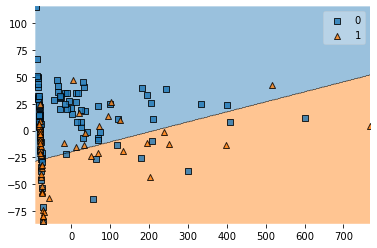

In [45]:
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_2D, y, test_size = 0.2, stratify=y, random_state=42)
lr = LogisticRegression(C=1)
lr.fit(X_train, y_train)

plot_decision_regions(X_test, y_test, clf=lr, legend=1)
plt.show()